In [1]:
# load all the library required.
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import urllib

In [52]:
# read the meta data.
df2 = pd.read_csv("./Open Data/number-of-deaths-by-risk-factor.csv")

In [3]:
# see what the dataframe looks like.
df2.head()

,Entity,Code,Year,Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number),Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number),Deaths - No access to handwashing facility - Sex: Both - Age: All Ages (Number),Deaths - Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number),Deaths - Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Child wasting - Sex: Both - Age: All Ages (Number),...,Deaths - High systolic blood pressure - Sex: Both - Age: All Ages (Number),Deaths - Smoking - Sex: Both - Age: All Ages (Number),Deaths - Iron deficiency - Sex: Both - Age: All Ages (Number),Deaths - Vitamin A deficiency - Sex: Both - Age: All Ages (Number),Deaths - Low bone mineral density - Sex: Both - Age: All Ages (Number),Deaths - Air pollution - Sex: Both - Age: All Ages (Number),Deaths – Outdoor air pollution (all ages) (IHME),Deaths - Diet high in sodium - Sex: Both - Age: All Ages (Number),Deaths - Diet low in whole grains - Sex: Both - Age: All Ages (Number),Deaths - Diet low in nuts and seeds - Sex: Both - Age: All Ages (Number)
0,Afghanistan,AFG,1990,7554.049543,5887.747628,5412.314513,22388.497233,3221.138842,156.097553,22778.849249,...,28183.983348,6393.667372,726.431294,9344.131952,374.844056,26598.006727,4383.83,2737.197934,11381.377345,7299.867330
1,Afghanistan,AFG,1991,7359.676749,5732.770160,5287.891103,22128.758206,3150.559597,151.539851,22292.691113,...,28435.397514,6429.253320,739.245799,9330.182378,379.854237,26379.532218,4426.36,2741.184956,11487.832390,7386.764303
2,Afghanistan,AFG,1992,7650.437822,5954.804987,5506.657363,22873.768789,3331.349048,156.609194,23102.197940,...,29173.611201,6561.054957,873.485341,9769.844533,388.130434,27263.127914,4568.91,2798.560245,11866.235572,7640.628526
3,Afghanistan,AFG,1993,10270.731383,7986.736613,7104.620351,25599.756284,4477.006100,206.834451,27902.669960,...,30074.760910,6731.972560,1040.047422,11433.769491,405.577931,30495.561499,5080.29,2853.301679,12335.961682,7968.311853
4,Afghanistan,AFG,1994,11409.177112,8863.010065,8051.515953,28013.167200,5102.622054,233.930571,32929.005932,...,30809.491169,6889.328118,1101.764645,12936.955863,415.349195,33323.161401,5499.23,2880.025765,12672.950191,8244.368430


In [54]:
df2.dtypes

Entity                                                                                     object
Code                                                                                       object
Year                                                                                        int64
Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number)                         float64
Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number)                           float64
Deaths - No access to handwashing facility - Sex: Both - Age: All Ages (Number)           float64
Deaths - Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number)    float64
Deaths - Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number)                 float64
Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (Number)                  float64
Deaths - Child wasting - Sex: Both - Age: All Ages (Number)                               float64
Deaths - Child stunt

In [55]:
df2 = df2.loc[df2["Year"] >= 2010]

In [56]:
# groupby and aggregate the df by all.
df2_sum = df2.groupby([True]*len(df2)).agg(sum)

In [57]:
# drop the "Year" column
df2_sum = df2_sum.drop(['Year'], axis=1)

In [58]:
# see what dataframe looks like now.
df2_sum

,Deaths - Unsafe water source - Sex: Both - Age: All Ages (Number),Deaths - Unsafe sanitation - Sex: Both - Age: All Ages (Number),Deaths - No access to handwashing facility - Sex: Both - Age: All Ages (Number),Deaths - Household air pollution from solid fuels - Sex: Both - Age: All Ages (Number),Deaths - Non-exclusive breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Discontinued breastfeeding - Sex: Both - Age: All Ages (Number),Deaths - Child wasting - Sex: Both - Age: All Ages (Number),Deaths - Child stunting - Sex: Both - Age: All Ages (Number),Deaths - Low birth weight for gestation - Sex: Both - Age: All Ages (Number),Deaths - Secondhand smoke - Sex: Both - Age: All Ages (Number),...,Deaths - High systolic blood pressure - Sex: Both - Age: All Ages (Number),Deaths - Smoking - Sex: Both - Age: All Ages (Number),Deaths - Iron deficiency - Sex: Both - Age: All Ages (Number),Deaths - Vitamin A deficiency - Sex: Both - Age: All Ages (Number),Deaths - Low bone mineral density - Sex: Both - Age: All Ages (Number),Deaths - Air pollution - Sex: Both - Age: All Ages (Number),Deaths – Outdoor air pollution (all ages) (IHME),Deaths - Diet high in sodium - Sex: Both - Age: All Ages (Number),Deaths - Diet low in whole grains - Sex: Both - Age: All Ages (Number),Deaths - Diet low in nuts and seeds - Sex: Both - Age: All Ages (Number)
True,4.716857e+07,3.199519e+07,2.804878e+07,6.460559e+07,7.225284e+06,481580.638197,4.909321e+07,1.106151e+07,4.537975e+07,4.395396e+07,...,3.699237e+08,2.609370e+08,2.481910e+06,1.132594e+07,1.104606e+07,1.786913e+08,1.184379e+08,1.154143e+08,1.092266e+08,7.322642e+07


In [59]:
# transpose columns and rows.
df2_sum = df2_sum.T

In [60]:
# reset the index and make Name of factor as a column 'index'.
df2_sum = df2_sum.reset_index()

In [61]:
# rename the columns.
df2_sum.columns = ["Name", "Numbers"]

In [62]:
# sort the ranking by Number of deaths.
df2_sum = df2_sum.sort_values(by = ['Numbers'], ascending = False)

In [63]:
# look at the data.
df2_sum

,Name,Numbers
19,Deaths - High systolic blood pressure - Sex: B...,3.699237e+08
20,Deaths - Smoking - Sex: Both - Age: All Ages (...,2.609370e+08
16,Deaths - High fasting plasma glucose - Sex: Bo...,2.266812e+08
24,Deaths - Air pollution - Sex: Both - Age: All ...,1.786913e+08
18,Deaths - High body-mass index - Sex: Both - Ag...,1.621972e+08
25,Deaths – Outdoor air pollution (all ages) (IHME),1.184379e+08
26,Deaths - Diet high in sodium - Sex: Both - Age...,1.154143e+08
27,Deaths - Diet low in whole grains - Sex: Both ...,1.092266e+08
10,Deaths - Alcohol use - Sex: Both - Age: All Ag...,1.042103e+08
12,Deaths - Diet low in fruits - Sex: Both - Age:...,8.866131e+07


In [64]:
# write the data as a wrangled file.
df2_sum.to_csv("top_factors_cause_to_death_1.csv", index = False)

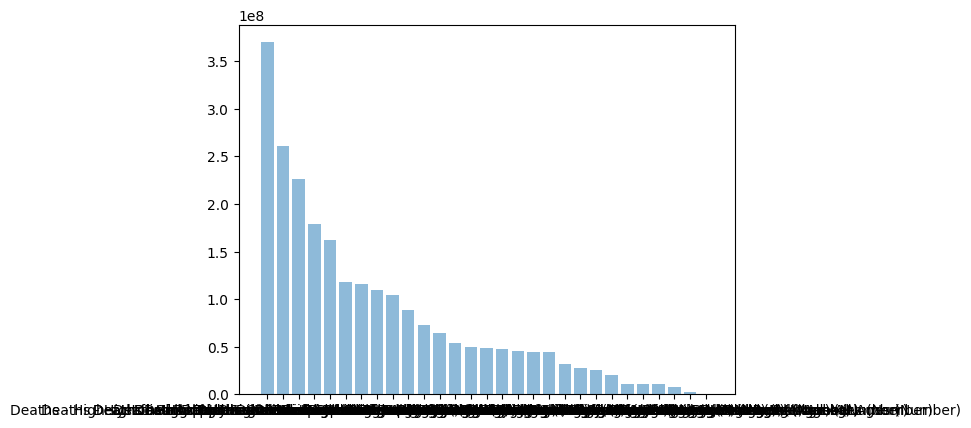

In [65]:
x = df2_sum["Name"]
y = df2_sum["Numbers"]
# colors = colors = np.random.rand(50)
# area = (30 * np.random.rand(50))**2  # 0 to 15 point radii
plt.bar(x, y, alpha=0.5)
plt.show()